In [1]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv(r'C:\Users\chand\Desktop\Robot Sensing & Navigation\Assignments\Lab2_dataset\open_stay-GPS-utm.csv')

In [3]:
df.head()

time  .header.seq  .header.stamp.secs  \
0  2022/02/16/18:19:39.401097          347          1645053579   
1  2022/02/16/18:19:39.401592          348          1645053579   
2  2022/02/16/18:19:39.604279          349          1645053579   
3  2022/02/16/18:19:39.604392          350          1645053579   
4  2022/02/16/18:19:39.804466          351          1645053579   

   .header.stamp.nsecs  .header.frame_id       .utm_e       .utm_n    .alt  \
0            398741006               NaN  328112.4142  4689548.480  18.451   
1            398741006               NaN  328112.4142  4689548.480  18.451   
2            601670026               NaN  328112.4143  4689548.482  18.453   
3            601670026               NaN  328112.4143  4689548.482  18.453   
4            802979946               NaN  328112.4136  4689548.486  18.455   

   .fix_qua  .zone_num .zone_letter  
0         5         19            T  
1         5         19            T  
2         5         19            T  
3         5         19            T  
4         5         19            T

In [37]:
df["utm_e"] = df[".utm_e"].transform(lambda x: x - x.min())
df["utm_n"] = df[".utm_n"].transform(lambda x: x - x.min())
df["alt"] = df[".alt"].transform(lambda x: x - x.min())
df['utm_e_err']=df["utm_e"].transform(lambda x: (x - df["utm_e"].mean())**2).abs()
df['utm_n_err']=df["utm_n"].transform(lambda x: (x - df["utm_n"].mean())**2).abs()
df["Time"] = df[".header.stamp.secs"].transform(lambda x: x - x.min())

df.head(10)

time  .header.seq  .header.stamp.secs  \
0  2022/02/16/18:19:39.401097          347          1645053579   
1  2022/02/16/18:19:39.401592          348          1645053579   
2  2022/02/16/18:19:39.604279          349          1645053579   
3  2022/02/16/18:19:39.604392          350          1645053579   
4  2022/02/16/18:19:39.804466          351          1645053579   
5  2022/02/16/18:19:39.804509          352          1645053579   
6  2022/02/16/18:19:40.006061          353          1645053580   
7  2022/02/16/18:19:40.006089          354          1645053580   
8  2022/02/16/18:19:40.185295          355          1645053580   
9  2022/02/16/18:19:40.185530          356          1645053580   

   .header.stamp.nsecs  .header.frame_id       .utm_e       .utm_n    .alt  \
0            398741006               NaN  328112.4142  4689548.480  18.451   
1            398741006               NaN  328112.4142  4689548.480  18.451   
2            601670026               NaN  328112.4143  4689548.482  18.453   
3            601670026               NaN  328112.4143  4689548.482  18.453   
4            802979946               NaN  328112.4136  4689548.486  18.455   
5            802979946               NaN  328112.4136  4689548.486  18.455   
6              4012107               NaN  328112.4124  4689548.488  18.451   
7              4012107               NaN  328112.4124  4689548.488  18.451   
8            184930801               NaN  328112.4144  4689548.491  18.457   
9            184930801               NaN  328112.4144  4689548.491  18.457   

   .fix_qua  .zone_num .zone_letter   utm_e  utm_n    alt  utm_e_err  \
0         5         19            T  2.0115  1.818  0.006   1.581256   
1         5         19            T  2.0115  1.818  0.006   1.581256   
2         5         19            T  2.0116  1.820  0.008   1.581507   
3         5         19            T  2.0116  1.820  0.008   1.581507   
4         5         19            T  2.0109  1.824  0.010   1.579747   
5         5         19            T  2.0109  1.824  0.010   1.579747   
6         5         19            T  2.0097  1.826  0.006   1.576732   
7         5         19            T  2.0097  1.826  0.006   1.576732   
8         5         19            T  2.0117  1.829  0.012   1.581759   
9         5         19            T  2.0117  1.829  0.012   1.581759   

   utm_n_err  Time  
0   0.637005     0  
1   0.637005     0  
2   0.640201     0  
3   0.640201     0  
4   0.646618     0  
5   0.646618     0  
6   0.649839     1  
7   0.649839     1  
8   0.654684     1  
9   0.654684     1

In [74]:
utm_e_mean = df["utm_e"].mean()
utm_n_mean = df["utm_n"].mean()
utm_e_mean, utm_n_mean

(0.754019994054758, 1.019874366312959)

In [76]:
df["utm_e"].std(), df["utm_n"].std()

(0.7916219456747086, 0.6048778377959999)

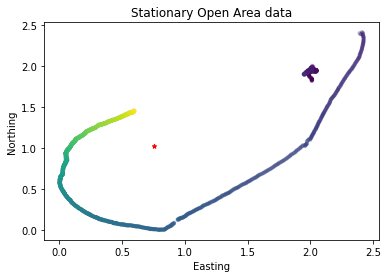

In [8]:
%matplotlib inline
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.title('Stationary Open Area data')
plt.scatter(df["utm_e"], df['utm_n'], c=df['.header.stamp.secs'],s = 10, marker='o', alpha=0.1)
plt.scatter(df["utm_e"].mean(), df["utm_n"].mean(), color='r',s = 20, marker='*', alpha=1)
plt.show()

In [49]:
import math
Variance = (df['utm_e_err'].sum() + df['utm_n_err'].sum())/6702
    
STD = math.sqrt(Variance)
STD

0.9961899452746474

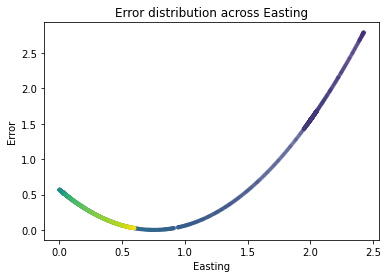

In [9]:
%matplotlib inline
plt.xlabel('Easting')
plt.ylabel('Error')
plt.title('Error distribution across Easting')
plt.scatter(df["utm_e"], df['utm_e_err'], c=df['.header.stamp.secs'],s = 10, marker='o', alpha=0.1)
plt.show()

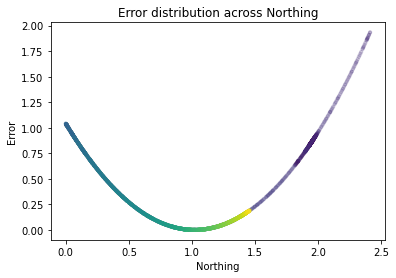

In [10]:
%matplotlib inline
plt.xlabel('Northing')
plt.ylabel('Error')
plt.title('Error distribution across Northing')
plt.scatter(df["utm_n"], df['utm_n_err'], c=df['.header.stamp.secs'],s = 10, marker='o', alpha=0.1)
plt.show()

In [38]:
%matplotlib inline
plt.xlabel('Time')
plt.ylabel('Stationary Altitude')
plt.title('Stationary Altitude vs Time')
plt.scatter(df["Time"], df['alt'], color='m',s = 10, marker='o', alpha=1)

In [12]:
df2 = pd.read_csv(r'C:\Users\chand\Desktop\Robot Sensing & Navigation\Assignments\Lab2_dataset\build_stay-GPS-utm.csv')

In [13]:
df2.head()

time  .header.seq  .header.stamp.secs  \
0  2022/02/16/18:59:42.725865        21179          1645055982   
1  2022/02/16/18:59:42.725958        21180          1645055982   
2  2022/02/16/18:59:42.924933        21181          1645055982   
3  2022/02/16/18:59:42.924980        21182          1645055982   
4  2022/02/16/18:59:43.122919        21183          1645055983   

   .header.stamp.nsecs  .header.frame_id       .utm_e       .utm_n     .alt  \
0            723570585               NaN  328038.1346  4689583.254  151.876   
1            723570585               NaN  328038.1346  4689583.254  151.876   
2            922315597               NaN  328037.7207  4689582.903  154.078   
3            922315597               NaN  328037.7207  4689582.903  154.078   
4            120799779               NaN  328037.3203  4689582.831  156.324   

   .fix_qua  .zone_num .zone_letter  
0         5         19            T  
1         5         19            T  
2         5         19            T  
3         5         19            T  
4         5         19            T

In [45]:
df2["utm_e"] = df2[".utm_e"].transform(lambda x: x - x.min())
df2["utm_n"] = df2[".utm_n"].transform(lambda x: x - x.min())
df2["alt"] = df2[".alt"].transform(lambda x: x - x.min())
df2['utm_e_err']=df2["utm_e"].transform(lambda x: (x - df["utm_e"].mean())**2).abs()
df2['utm_n_err']=df2["utm_n"].transform(lambda x: (x - df["utm_n"].mean())**2).abs()
df2["Time"] = df2[".header.stamp.secs"].transform(lambda x: x - x.min())
df2.head()

time  .header.seq  .header.stamp.secs  \
0  2022/02/16/18:59:42.725865        21179          1645055982   
1  2022/02/16/18:59:42.725958        21180          1645055982   
2  2022/02/16/18:59:42.924933        21181          1645055982   
3  2022/02/16/18:59:42.924980        21182          1645055982   
4  2022/02/16/18:59:43.122919        21183          1645055983   

   .header.stamp.nsecs  .header.frame_id       .utm_e       .utm_n     .alt  \
0            723570585               NaN  328038.1346  4689583.254  151.876   
1            723570585               NaN  328038.1346  4689583.254  151.876   
2            922315597               NaN  328037.7207  4689582.903  154.078   
3            922315597               NaN  328037.7207  4689582.903  154.078   
4            120799779               NaN  328037.3203  4689582.831  156.324   

   .fix_qua  .zone_num .zone_letter   utm_e  utm_n      alt  utm_e_err  \
0         5         19            T  1.6194  1.869  665.556   0.748883   
1         5         19            T  1.6194  1.869  665.556   0.748883   
2         5         19            T  1.2055  1.518  667.758   0.203834   
3         5         19            T  1.2055  1.518  667.758   0.203834   
4         5         19            T  0.8051  1.446  670.004   0.002609   

   utm_n_err  Time  
0   0.721014     0  
1   0.721014     0  
2   0.248129     0  
3   0.248129     0  
4   0.181583     1

In [48]:
Variance_Stationary_build = (df2['utm_e_err'].sum() + df2['utm_n_err'].sum())/6702
    
STD_Stationary_build = math.sqrt(Variance_Stationary_build)
STD_Stationary_build

31.76814601403658

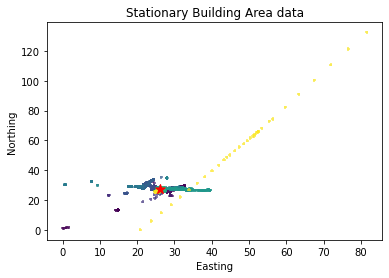

In [54]:
%matplotlib inline
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.title('Stationary Building Area data')
plt.scatter(df2['utm_e'], df2['utm_n'],c=df2['.header.stamp.secs'],s = 10, marker='+', alpha=0.5)
plt.scatter(df2["utm_e"].mean(), df2['utm_n'].mean(), color='r',s = 100, marker='*', alpha=1)

In [77]:
df2["utm_e"].mean(), df2["utm_n"].mean()

(26.084461002064057, 27.69938162861427)

In [78]:
df2["utm_e"].std(), df2["utm_n"].std()

(5.134853657055127, 5.681244990270869)

In [51]:
%matplotlib inline
plt.xlabel('Easting')
plt.ylabel('Error')
plt.title('Error distribution across Easting for static reflectance area')
plt.scatter(df2["utm_e"], df2['utm_e_err'], c=df2['.header.stamp.secs'],s = 10, marker='o', alpha=0.1)
plt.show()

In [52]:
%matplotlib inline
plt.xlabel('Northing')
plt.ylabel('Error')
plt.title('Error distribution across Northing for static reflectance area')
plt.scatter(df2["utm_n"], df2['utm_n_err'], c=df2['.header.stamp.secs'],s = 10, marker='o', alpha=0.1)
plt.show()

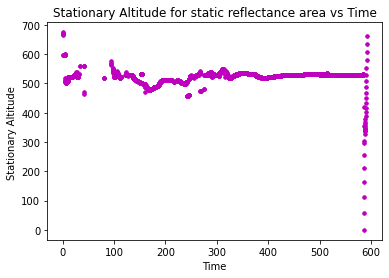

In [53]:
%matplotlib inline
plt.xlabel('Time')
plt.ylabel('Stationary Altitude ')
plt.title('Stationary Altitude for static reflectance area vs Time')
plt.scatter(df2["Time"], df2['alt'], color='m',s = 10, marker='o', alpha=1)

In [16]:
df1 = pd.read_csv(r'C:\Users\chand\Desktop\Robot Sensing & Navigation\Assignments\Lab2_dataset\open_move-GPS-utm.csv')

In [17]:
df1.head()

time  .header.seq  .header.stamp.secs  \
0  2022/02/16/18:34:41.423121         8655          1645054481   
1  2022/02/16/18:34:41.423393         8656          1645054481   
2  2022/02/16/18:34:41.622156         8657          1645054481   
3  2022/02/16/18:34:41.622925         8658          1645054481   
4  2022/02/16/18:34:41.826337         8659          1645054481   

   .header.stamp.nsecs  .header.frame_id       .utm_e       .utm_n    .alt  \
0            420781612               NaN  328125.2540  4689563.299  15.260   
1            420781612               NaN  328125.2540  4689563.299  15.260   
2            620517969               NaN  328125.2594  4689563.303  15.247   
3            620517969               NaN  328125.2594  4689563.303  15.247   
4            824019908               NaN  328125.2745  4689563.300  15.214   

   .fix_qua  .zone_num .zone_letter  
0         5         19            T  
1         5         19            T  
2         5         19            T  
3         5         19            T  
4         5         19            T

In [55]:
df1["utm_e"] = df1[".utm_e"].transform(lambda x: x - x.min())
df1["utm_n"] = df1[".utm_n"].transform(lambda x: x - x.min())
df1["alt"] = df1[".alt"].transform(lambda x: x - x.min())
df1['utm_e_err']=df1["utm_e"].transform(lambda x: (x - df1["utm_e"].mean())**2).abs()
df1['utm_n_err']=df1["utm_n"].transform(lambda x: (x - df1["utm_n"].mean())**2).abs()
df1["Time"] = df1[".header.stamp.secs"].transform(lambda x: x - x.min())
df1.head()

time  .header.seq  .header.stamp.secs  \
0  2022/02/16/18:34:41.423121         8655          1645054481   
1  2022/02/16/18:34:41.423393         8656          1645054481   
2  2022/02/16/18:34:41.622156         8657          1645054481   
3  2022/02/16/18:34:41.622925         8658          1645054481   
4  2022/02/16/18:34:41.826337         8659          1645054481   

   .header.stamp.nsecs  .header.frame_id       .utm_e       .utm_n    .alt  \
0            420781612               NaN  328125.2540  4689563.299  15.260   
1            420781612               NaN  328125.2540  4689563.299  15.260   
2            620517969               NaN  328125.2594  4689563.303  15.247   
3            620517969               NaN  328125.2594  4689563.303  15.247   
4            824019908               NaN  328125.2745  4689563.300  15.214   

   .fix_qua  .zone_num .zone_letter    utm_e   utm_n    alt   utm_e_err  \
0         5         19            T  55.8615  62.637  2.367  543.155437   
1         5         19            T  55.8615  62.637  2.367  543.155437   
2         5         19            T  55.8669  62.641  2.354  543.407168   
3         5         19            T  55.8669  62.641  2.354  543.407168   
4         5         19            T  55.8820  62.638  2.321  544.111391   

    utm_n_err  Time  
0  912.526987     0  
1  912.526987     0  
2  912.768668     0  
3  912.768668     0  
4  912.587404     0

In [56]:
%matplotlib inline
plt.xlabel('Time')
plt.ylabel('Altitude ')
plt.title('Altitude for moving open area vs Time')
plt.scatter(df1["Time"], df1['alt'], color='m',s = 10, marker='o', alpha=1)

In [19]:
df.tail()

time  .header.seq  .header.stamp.secs  \
6697  2022/02/16/18:31:05.620590         7044          1645054265   
6698  2022/02/16/18:31:05.826392         7045          1645054265   
6699  2022/02/16/18:31:05.826448         7046          1645054265   
6700  2022/02/16/18:31:06.032047         7047          1645054266   
6701  2022/02/16/18:31:06.032419         7048          1645054266   

      .header.stamp.nsecs  .header.frame_id       .utm_e       .utm_n    .alt  \
6697            618248701               NaN  328110.9983  4689548.117  19.008   
6698            823748350               NaN  328110.9982  4689548.116  19.008   
6699            823748350               NaN  328110.9982  4689548.116  19.008   
6700             30683279               NaN  328110.9974  4689548.114  19.007   
6701             30683279               NaN  328110.9974  4689548.114  19.007   

      .fix_qua  .zone_num .zone_letter   utm_e  utm_n    alt  utm_e_err  \
6697         5         19            T  0.5956  1.455  0.563   0.025097   
6698         5         19            T  0.5955  1.454  0.563   0.025129   
6699         5         19            T  0.5955  1.454  0.563   0.025129   
6700         5         19            T  0.5947  1.452  0.562   0.025383   
6701         5         19            T  0.5947  1.452  0.562   0.025383   

      utm_n_err  
6697   0.189334  
6698   0.188465  
6699   0.188465  
6700   0.186733  
6701   0.186733

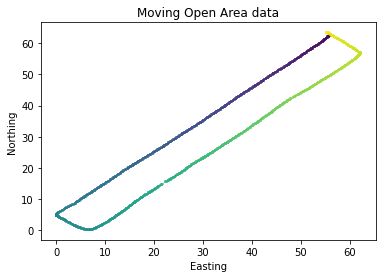

In [20]:
%matplotlib inline
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.title('Moving Open Area data')
plt.scatter(df1['utm_e'], df1['utm_n'], c = df1['.header.stamp.secs'],s = 10, marker='+', alpha=0.5)
plt.show()

In [21]:
#finding the corners of moving data
p1 = df1[df1['utm_n']==df1['utm_n'].max()].index.values.tolist()[0]
p2 = df1[df1['utm_e']==df1['utm_e'].min()].index.values.tolist()[0]
p3 = df1[df1['utm_n']==df1['utm_n'].min()].index.values.tolist()[0]
p4 = df1[df1['utm_e']==df1['utm_e'].max()].index.values.tolist()[0]
p1,p2,p3,p4

(1412, 634, 716, 1304)

In [91]:
df1['utm_n'].count()

1428

In [23]:
df1.loc[df1['utm_n']==62.637].index

Int64Index([], dtype='int64')

In [24]:

import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Z1 = df1.iloc[1:634]
Z2 = df1.iloc[634:716]
Z3 = df1.iloc[716:1304]
Z4 = df1.iloc[1304:1412]

Z1

time  .header.seq  .header.stamp.secs  \
1    2022/02/16/18:34:41.423393         8656          1645054481   
2    2022/02/16/18:34:41.622156         8657          1645054481   
3    2022/02/16/18:34:41.622925         8658          1645054481   
4    2022/02/16/18:34:41.826337         8659          1645054481   
5    2022/02/16/18:34:41.826415         8660          1645054481   
..                          ...          ...                 ...   
629  2022/02/16/18:35:44.514978         9284          1645054544   
630  2022/02/16/18:35:44.714440         9285          1645054544   
631  2022/02/16/18:35:44.714542         9286          1645054544   
632  2022/02/16/18:35:44.912929         9287          1645054544   
633  2022/02/16/18:35:44.914096         9288          1645054544   

     .header.stamp.nsecs  .header.frame_id       .utm_e       .utm_n    .alt  \
1              420781612               NaN  328125.2540  4689563.299  15.260   
2              620517969               NaN  328125.2594  4689563.303  15.247   
3              620517969               NaN  328125.2594  4689563.303  15.247   
4              824019908               NaN  328125.2745  4689563.300  15.214   
5              824019908               NaN  328125.2745  4689563.300  15.214   
..                   ...               ...          ...          ...     ...   
629            512879610               NaN  328069.5894  4689505.937  15.379   
630            712505578               NaN  328069.4825  4689505.787  15.397   
631            712505578               NaN  328069.4825  4689505.787  15.397   
632            911031484               NaN  328069.4240  4689505.630  15.394   
633            911031484               NaN  328069.4240  4689505.630  15.394   

     .fix_qua  .zone_num .zone_letter    utm_e   utm_n    alt  
1           5         19            T  55.8615  62.637  2.367  
2           5         19            T  55.8669  62.641  2.354  
3           5         19            T  55.8669  62.641  2.354  
4           5         19            T  55.8820  62.638  2.321  
5           5         19            T  55.8820  62.638  2.321  
..        ...        ...          ...      ...     ...    ...  
629         5         19            T   0.1969   5.275  2.486  
630         5         19            T   0.0900   5.125  2.504  
631         5         19            T   0.0900   5.125  2.504  
632         5         19            T   0.0315   4.968  2.501  
633         5         19            T   0.0315   4.968  2.501  

[633 rows x 14 columns]

In [88]:
zn1 = linear_model.LinearRegression()
x = Z1["utm_e"].to_numpy().reshape(-1, 1)
y = Z1["utm_n"].to_numpy().reshape(-1, 1)
zn1.fit(x,y)
Z1['predict north'] = zn1.predict(x)
print(zn1.coef_)
Z1['error'] = Z1['utm_n'] - Z1['predict north']
Z1['sqr err'] = (Z1['error'])**2
#print(Z1)
Z1['sqr err'].sum()

[[1.02716738]]


<ipython-input-88-b957df0c882c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z1['predict north'] = zn1.predict(x)
<ipython-input-88-b957df0c882c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z1['error'] = Z1['utm_n'] - Z1['predict north']
<ipython-input-88-b957df0c882c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

31.32593810535768

In [89]:
zn2 = linear_model.LinearRegression()
x = Z2["utm_e"].to_numpy().reshape(-1, 1)
y = Z2["utm_n"].to_numpy().reshape(-1, 1)
zn2.fit(x,y)
Z2['predict north'] = zn2.predict(x)
print(zn2.coef_)
Z2['error'] = Z2['utm_n'] - Z2['predict north']
Z2['sqr err'] = (Z2['error'])**2
#print(Z1)
Z2['sqr err'].sum()

[[-0.74844069]]


<ipython-input-89-9fa504366abd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z2['predict north'] = zn2.predict(x)
<ipython-input-89-9fa504366abd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z2['error'] = Z2['utm_n'] - Z2['predict north']
<ipython-input-89-9fa504366abd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

2.9646143740290283

In [90]:
zn3 = linear_model.LinearRegression()
x = Z3["utm_e"].to_numpy().reshape(-1, 1)
y = Z3["utm_n"].to_numpy().reshape(-1, 1)
zn3.fit(x,y)
Z3['predict north'] = zn3.predict(x)
print(zn3.coef_)
Z3['error'] = Z3['utm_n'] - Z3['predict north']
Z3['sqr err'] = (Z3['error'])**2
#print(Z1)
Z3['sqr err'].sum()

[[1.03191111]]


<ipython-input-90-b057ad82928e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z3['predict north'] = zn3.predict(x)
<ipython-input-90-b057ad82928e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z3['error'] = Z3['utm_n'] - Z3['predict north']
<ipython-input-90-b057ad82928e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

37.95833656751242

In [28]:
zn4 = linear_model.LinearRegression()
x = Z4["utm_e"].to_numpy().reshape(-1, 1)
y = Z4["utm_n"].to_numpy().reshape(-1, 1)
zn4.fit(x,y)
Z4['predict north'] = zn4.predict(x)
print(zn4.coef_)
Z4['error'] = Z4['utm_n'] - Z4['predict north']
Z4['sqr err'] = (Z4['error'])**2
#print(Z4)
Z4['sqr err'].sum()

[[-0.96162956]]


<ipython-input-28-4bf9bc20d240>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z4['predict north'] = zn4.predict(x)
<ipython-input-28-4bf9bc20d240>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z4['error'] = Z4['utm_n'] - Z4['predict north']
<ipython-input-28-4bf9bc20d240>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

0.6020464944109232

In [29]:
fig = plt.figure(figsize = (10,8))
plt.scatter(df1['utm_e'],df1['utm_n'],s = 10,c = df1['.header.seq'])

plt.plot(Z1["utm_e"],Z1['predict north'],"r-")

plt.plot(Z2["utm_e"],Z2['predict north'],"r-")

plt.plot(Z3["utm_e"],Z3['predict north'],"r-")

plt.plot(Z4["utm_e"],Z4['predict north'],"r-")

plt.xlabel('UTM_E',labelpad = 14)
plt.ylabel('UTM_N', labelpad = 14)
plt.title('MOVING DATA IN CLEAR ZONE')

plt.show()

In [59]:
df3 = pd.read_csv(r'C:\Users\chand\Desktop\Robot Sensing & Navigation\Assignments\Lab2_dataset\build_move_3-GPS-utm.csv')

In [60]:
df3.head()

time  .header.seq  .header.stamp.secs  \
0  2022/02/16/19:30:29.949779        37885          1645057829   
1  2022/02/16/19:30:29.949895        37886          1645057829   
2  2022/02/16/19:30:30.147952        37887          1645057830   
3  2022/02/16/19:30:30.149317        37888          1645057830   
4  2022/02/16/19:30:30.356356        37889          1645057830   

   .header.stamp.nsecs  .header.frame_id       .utm_e       .utm_n    .alt  \
0            947252035               NaN  328076.3124  4689578.588  18.912   
1            947252035               NaN  328076.3124  4689578.588  18.912   
2            146441936               NaN  328076.3295  4689578.597  18.713   
3            146441936               NaN  328076.3295  4689578.597  18.713   
4            354337215               NaN  328076.3220  4689578.604  18.498   

   .fix_qua  .zone_num .zone_letter    UTM_E  UTM_N  
0         5         19            T  71.8717  6.026  
1         5         19            T  71.8717  6.026  
2         5         19            T  71.8888  6.035  
3         5         19            T  71.8888  6.035  
4         5         19            T  71.8813  6.042

In [97]:
df3["utm_e"] = df3[".utm_e"].transform(lambda x: x - x.min())
df3["utm_n"] = df3[".utm_n"].transform(lambda x: x - x.min())
df3["alt"] = df3[".alt"].transform(lambda x: x - x.min())
df3["Time"] = df3[".header.stamp.secs"].transform(lambda x: x - x.min())
df3.head()

time  .header.seq  .header.stamp.secs  \
0  2022/02/16/19:30:29.949779        37885          1645057829   
1  2022/02/16/19:30:29.949895        37886          1645057829   
2  2022/02/16/19:30:30.147952        37887          1645057830   
3  2022/02/16/19:30:30.149317        37888          1645057830   
4  2022/02/16/19:30:30.356356        37889          1645057830   

   .header.stamp.nsecs  .header.frame_id       .utm_e       .utm_n    .alt  \
0            947252035               NaN  328076.3124  4689578.588  18.912   
1            947252035               NaN  328076.3124  4689578.588  18.912   
2            146441936               NaN  328076.3295  4689578.597  18.713   
3            146441936               NaN  328076.3295  4689578.597  18.713   
4            354337215               NaN  328076.3220  4689578.604  18.498   

   .fix_qua  .zone_num .zone_letter    UTM_E  UTM_N    utm_e  utm_n     alt  \
0         5         19            T  71.8717  6.026  71.8717  6.026  49.722   
1         5         19            T  71.8717  6.026  71.8717  6.026  49.722   
2         5         19            T  71.8888  6.035  71.8888  6.035  49.523   
3         5         19            T  71.8888  6.035  71.8888  6.035  49.523   
4         5         19            T  71.8813  6.042  71.8813  6.042  49.308   

   Time  
0     0  
1     0  
2     1  
3     1  
4     1

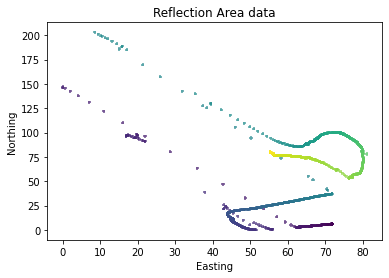

In [98]:
%matplotlib inline
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.title('Reflection Area data')
plt.scatter(df3['utm_e'], df3['utm_n'], c = df3['.header.stamp.secs'],s = 10, marker='+', alpha=0.5)
plt.show()

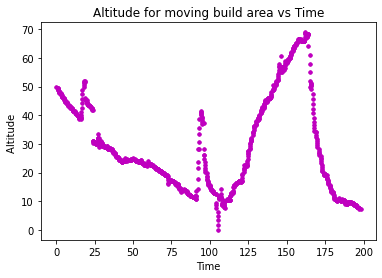

In [99]:
%matplotlib inline
plt.xlabel('Time')
plt.ylabel('Altitude ')
plt.title('Altitude for moving build area vs Time')
plt.scatter(df3["Time"], df3['alt'], color='m',s = 10, marker='o', alpha=1)

In [71]:
df6 = pd.read_csv(r'C:\Users\chand\Desktop\Robot Sensing & Navigation\Assignments\Lab2_dataset\build_move.csv')

In [72]:
df6.head()

.header.stamp.secs  .header.stamp.nsecs  .header.frame_id       .utm_e  \
0          1645057829            947252035               NaN  328076.3124   
1          1645057829            947252035               NaN  328076.3124   
2          1645057830            146441936               NaN  328076.3295   
3          1645057830            146441936               NaN  328076.3295   
4          1645057830            354337215               NaN  328076.3220   

        .utm_n    .alt  .fix_qua  .zone_num .zone_letter     UTME   UTMN  
0  4689578.588  18.912         5         19            T  71.8717  6.026  
1  4689578.588  18.912         5         19            T  71.8717  6.026  
2  4689578.597  18.713         5         19            T  71.8888  6.035  
3  4689578.597  18.713         5         19            T  71.8888  6.035  
4  4689578.604  18.498         5         19            T  71.8813  6.042

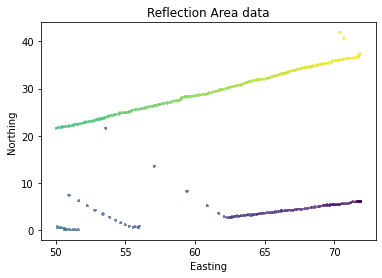

In [73]:
%matplotlib inline
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.title('Reflection Area data')
plt.scatter(df6['UTME'], df6['UTMN'], c = df6['.header.stamp.secs'],s = 10, marker='+', alpha=0.5)
plt.show()

In [96]:
df6["utm_e"] = df6[".utm_e"].transform(lambda x: x - x.min())
df6["utm_n"] = df6[".utm_n"].transform(lambda x: x - x.min())
df6["alt"] = df6[".alt"].transform(lambda x: x - x.min())
df6.head()

.header.stamp.secs  .header.stamp.nsecs  .header.frame_id       .utm_e  \
0          1645057829            947252035               NaN  328076.3124   
1          1645057829            947252035               NaN  328076.3124   
2          1645057830            146441936               NaN  328076.3295   
3          1645057830            146441936               NaN  328076.3295   
4          1645057830            354337215               NaN  328076.3220   

        .utm_n    .alt  .fix_qua  .zone_num .zone_letter     UTME   UTMN  \
0  4689578.588  18.912         5         19            T  71.8717  6.026   
1  4689578.588  18.912         5         19            T  71.8717  6.026   
2  4689578.597  18.713         5         19            T  71.8888  6.035   
3  4689578.597  18.713         5         19            T  71.8888  6.035   
4  4689578.604  18.498         5         19            T  71.8813  6.042   

     utm_e  utm_n     alt  
0  21.8356  6.026  38.851  
1  21.8356  6.026  38.851  
2  21.8527  6.035  38.652  
3  21.8527  6.035  38.652  
4  21.8452  6.042  38.437

In [95]:
#finding the corners of moving data
A1 = df6[df6['utm_n']==df6['utm_n'].max()].index.values.tolist()[0]
A2 = df6[df6['utm_e']==df6['utm_e'].min()].index.values.tolist()[0]
A3 = df6[df6['utm_n']==df6['utm_n'].min()].index.values.tolist()[0]
A4 = df6[df6['utm_e']==df6['utm_e'].max()].index.values.tolist()[0]
A1,A2,A3,A4

(516, 208, 190, 2)

In [100]:
ZONE1 = df1.iloc[212:519]


In [101]:
zn3 = linear_model.LinearRegression()
x = ZONE1["utm_e"].to_numpy().reshape(-1, 1)
y = ZONE1["utm_n"].to_numpy().reshape(-1, 1)
zn3.fit(x,y)
ZONE1['predict north'] = zn3.predict(x)
print(zn1.coef_)
ZONE1['error'] = ZONE1['utm_n'] - ZONE1['predict north']
ZONE1['sqr err'] = (ZONE1['error'])**2
#print(Z1)
ZONE1['sqr err'].sum()

[[1.02716738]]


<ipython-input-101-4eda5029b071>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ZONE1['predict north'] = zn3.predict(x)
<ipython-input-101-4eda5029b071>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ZONE1['error'] = ZONE1['utm_n'] - ZONE1['predict north']
<ipython-input-101-4eda5029b071>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

6.749755741084457

In [103]:
fig = plt.figure(figsize = (10,8))
plt.scatter(df6['utm_e'],df6['utm_n'],s = 10,c = df6['.header.stamp.secs'])

plt.plot(ZONE1["utm_e"],ZONE1['predict north'],"r-")


plt.xlabel('UTM_E',labelpad = 14)
plt.ylabel('UTM_N', labelpad = 14)
plt.title('MOVING DATA IN REFLECTION ZONE')

plt.show()